In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
# Search for the 'moon' image among possible file extensions
candidates = ['moon.tiff', 'moon.tif', 'moon.png']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"Moon image not found in paths: {candidates}")

In [25]:
# 1. Load the image in grayscale mode
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

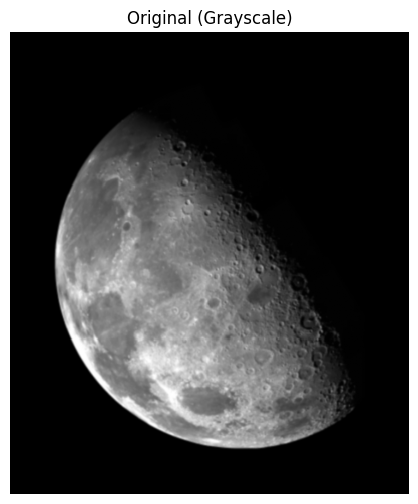

In [26]:
# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')
plt.show()

In [27]:
# Parameters for unsharp masking
k_list = [0.5, 1.0, 1.5]  # gain values to control sharpening strength
D0 = 30                   # cutoff frequency for the high-pass filter

In [28]:
# Precompute frequency-domain high-pass filter mask
M, N = img.shape
u = np.arange(M)
v = np.arange(N)
U, V = np.meshgrid(u - M // 2, v - N // 2, indexing='ij')
D = np.sqrt(U**2 + V**2)
H_hpf = 1 - np.exp(-(D**2) / (2 * (D0**2)))  # Gaussian high-pass filter

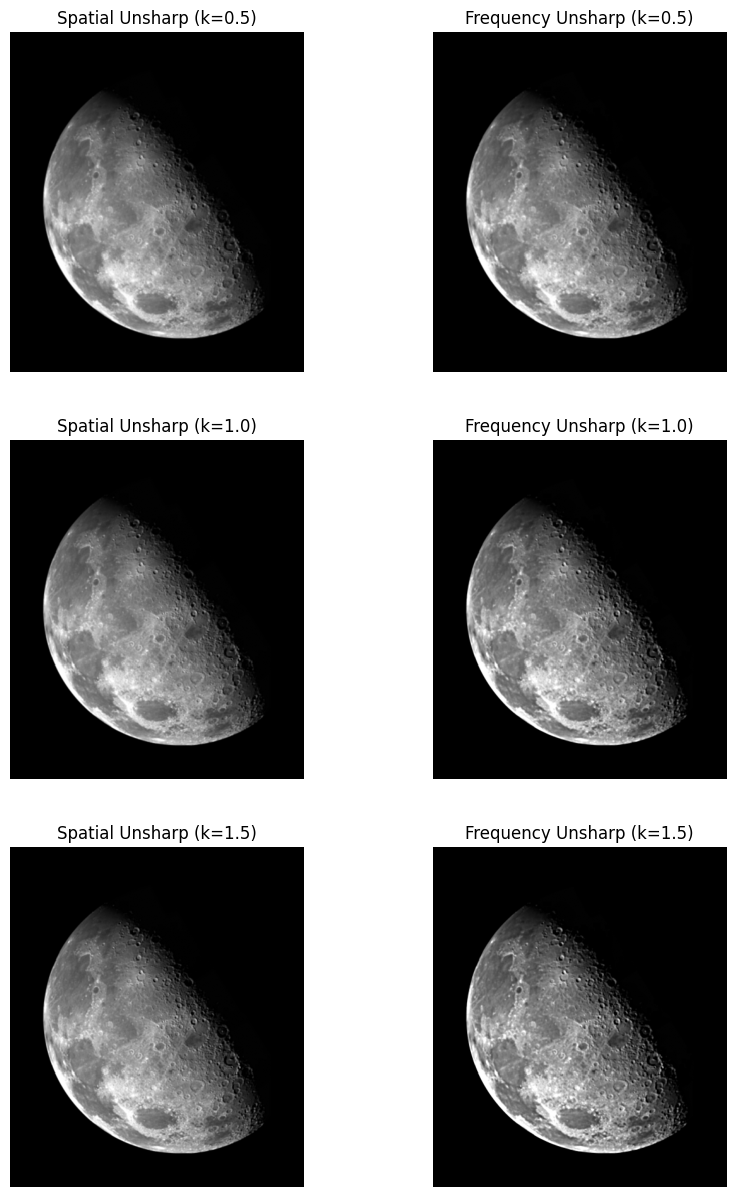

In [29]:
# 4. Allocate subplots
fig, axes = plt.subplots(len(k_list), 2, figsize=(10, 15))

for i, k in enumerate(k_list):
    # --- Spatial-domain unsharp masking ---
    blur = cv2.GaussianBlur(img, (5,5), sigmaX=1.0)
    mask_sp = img.astype(np.float32) - blur.astype(np.float32)
    spat = img.astype(np.float32) + k * mask_sp
    spat = np.clip(spat, 0, 255).astype(np.uint8)

    # --- Frequency-domain unsharp masking ---
    F  = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G_shift = (1 + k * H_hpf) * F_shift
    G = np.fft.ifftshift(G_shift)
    img_back = np.fft.ifft2(G)
    freq = np.clip(np.real(img_back), 0, 255).astype(np.uint8)

    # --- Plot results ---
    axes[i, 0].imshow(spat, cmap='gray')
    axes[i, 0].set_title(f'Spatial Unsharp (k={k})')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(freq, cmap='gray')
    axes[i, 1].set_title(f'Frequency Unsharp (k={k})')
    axes[i, 1].axis('off')

In [30]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [31]:
# Quick sanity check
print("Image shape and dtype:", img.shape, img.dtype)

Image shape and dtype: (540, 466) uint8
